#Data Description :

1.   Name: Brand and model name of the car
2.   Location: Location of the car
3.   Year: Manufactured year of the car
4.   kilometers_Driven: How much km has the car been driven
5.   Fuel_Type: CNG/Diesel/Petrol/LPG/Electric
6.   Transmission: Manual/Automatic
7.   Owner_Type: First/second/Third/Fourth or above
8.   Mileage: Mileage of the car
9.   Power: Power of the car
10.  Seats: No of seats in the car
11.  New _Price: New price of the car
12.  Price: Price of the used car

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file= pd.read_csv('/content/drive/MyDrive/Tugas Prediction Comparison/training_data.csv')

In [6]:
file

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,Mercedes-Benz M-Class ML 320 CDI,Mumbai,2009,102002,Diesel,Automatic,First,8.7 kmpl,2987 CC,224.34 bhp,5.0,NaN,10.75
6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,NaN,2.75
6008,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,45.00
6009,Toyota Camry Hybrid,Mumbai,2015,33500,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,NaN,19.75


In [ ]:
file.shape

(6011, 13)

**Cleaning Data**

In [ ]:
file.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5188
Price                   0
dtype: int64

In [ ]:
#Removing null values from seats columns:
file['Seats'].mode()
file['Seats'].fillna(value=5.0,inplace=True)

In [ ]:
#Mileage, Engine, and Power column also have null values but to remove them first we need to convert the datatype of these columns from object to numeric.
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6011 non-null   object 
 1   Location           6011 non-null   object 
 2   Year               6011 non-null   int64  
 3   Kilometers_Driven  6011 non-null   int64  
 4   Fuel_Type          6011 non-null   object 
 5   Transmission       6011 non-null   object 
 6   Owner_Type         6011 non-null   object 
 7   Mileage            6009 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              6011 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              6011 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 610.6+ KB


In [ ]:
#removing kmpl and km/kg from mileage column
file['Mileage'] = file['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
file['Mileage'] = file['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

In [ ]:
#removing CC from engine column
file['Engine'] = file['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

In [ ]:
#removing bhp from power column
file['Power'] = file['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

In [ ]:
#Converting the three columns to numeric type:
file['Mileage'] = pd.to_numeric(file['Mileage'], errors='coerce')
file['Engine'] = pd.to_numeric(file['Engine'], errors='coerce')
file['Power'] = pd.to_numeric(file['Power'], errors='coerce')

In [ ]:
#Removing null values from the 3 columns
file['Mileage'].mode()
file['Mileage'].fillna(value=17.0,inplace=True)

In [ ]:
#Removing null values from the 3 columns
file['Engine'].mode() 
file['Engine'].fillna(value=1197.0,inplace=True)

In [ ]:
#Removing null values from the 3 columns
file['Power'].mode() 
file['Power'].fillna(value=74.0,inplace=True)

#Feature engineering: Adding a new column in our data frame.

In [ ]:
file['Name'].nunique()

1875

In [ ]:
#The ‘Name’ column has so many values so we will separate the brand names from the column and create a new column ‘Brand_Name’.
file['Brand_Name'] = file['Name'].str.split(' ').str[0]
file.groupby('Brand_Name').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Brand_Name,,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,0,1
Audi,69,11,12,180,2,1,3,38,11,29,5,19,166
BMW,87,11,14,190,2,1,3,46,9,26,4,30,182
Bentley,1,1,1,1,1,1,1,1,1,1,1,0,1
Chevrolet,43,11,15,106,2,2,3,25,11,25,6,0,80
Datsun,9,7,3,12,1,1,1,5,2,4,2,6,12
Fiat,20,9,11,26,2,1,3,12,5,13,1,1,23
Force,2,2,1,2,1,1,1,1,2,2,1,0,2
Ford,114,11,17,237,2,2,4,40,16,33,3,21,178


In [ ]:
file['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [ ]:
#merging Isuzu and ISUZU
file.Brand_Name[file.Brand_Name=='Isuzu']='ISUZU'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Creating a new data frame that we will use for analysis.
#dropping the Name ,Location and new_price column
file1=file.drop(['Name','Location','New_Price'],axis='columns')

In [ ]:
file1

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...
6006,2009,102002,Diesel,Automatic,First,8.70,2987.0,224.34,5.0,10.75,Mercedes-Benz
6007,2011,68000,Diesel,Manual,First,19.30,1248.0,73.90,5.0,2.75,Maruti
6008,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,45.00,Porsche
6009,2015,33500,Petrol,Automatic,First,19.16,2494.0,158.20,5.0,19.75,Toyota


In [ ]:
file1.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand_Name           0
dtype: int64

#Data Analysis:

<Figure size 1440x576 with 0 Axes>

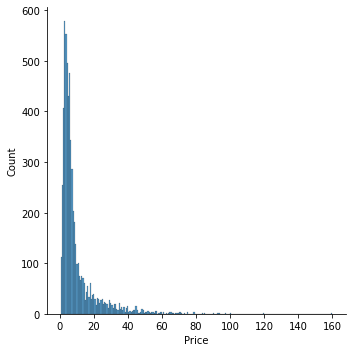

In [ ]:
plt.figure(figsize=(20,8))
sns.displot(file1['Price'])

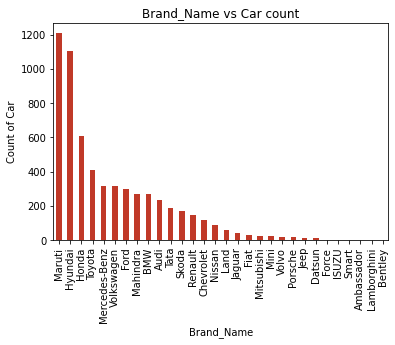

In [ ]:
#Analysis with respect to the number of cars: Brand_Name vs Car count
plt.xlabel('Brand_Name')
plt.ylabel('Count of Car')
file1['Brand_Name'].value_counts().plot(kind='bar', title='Brand_Name vs Car count', color='#c03928')

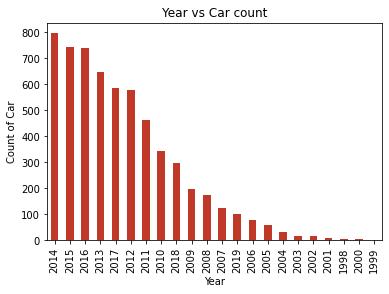

In [ ]:
#Year vs Car Count:
plt.xlabel('Year')
plt.ylabel('Count of Car')
file1['Year'].value_counts().plot(kind='bar', title='Year vs Car count', color='#c03928')

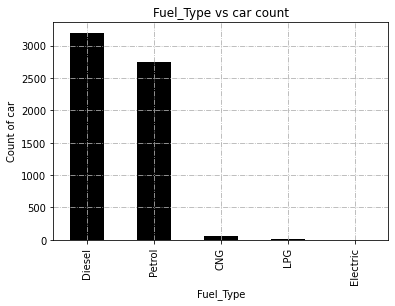

In [ ]:
#Analysis of other features with respect to car count.
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
file1['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='black')
plt.grid(linestyle='-.')

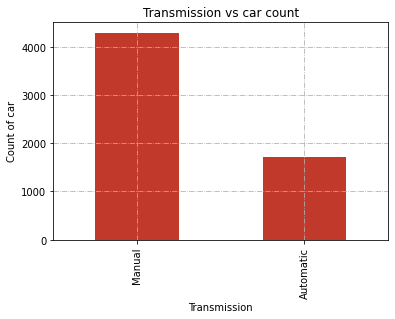

In [ ]:
#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
file1['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.grid(linestyle='-.')



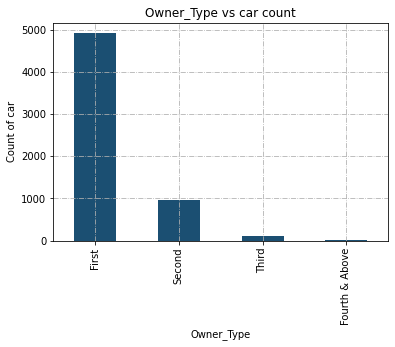

In [ ]:
#owner type
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
file1['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#1B4F72')
plt.grid(linestyle='-.')


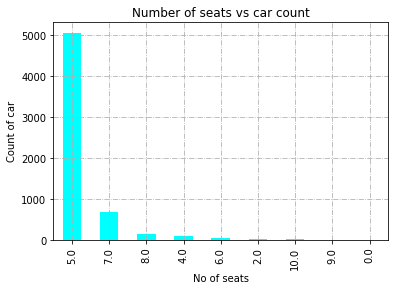

In [ ]:

#seats
plt.xlabel("No of seats")
plt.ylabel("Count of car")
file1['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.grid(linestyle='-.')

#Conclusion of the above features :

1.   Maximum cars are of petrol and diesel type.
2.   Manual cars are more than Automatic cars.
3.   First-hand cars are maximum followed by second.
4.   Cars with 5 seats are dominant.

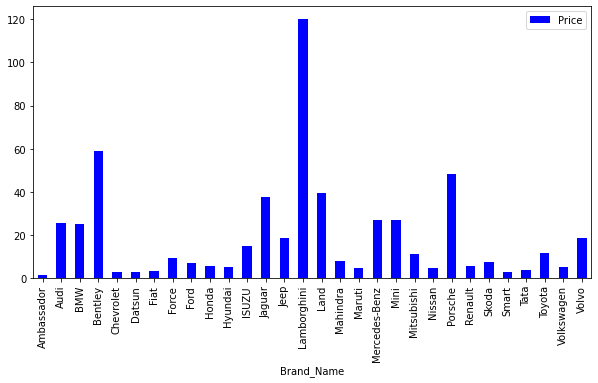

In [ ]:
BrandPrice = pd.DataFrame(file1.groupby('Brand_Name')['Price'].mean())
BrandPrice.plot.bar(color='blue', figsize=(10,5))
plt.show()

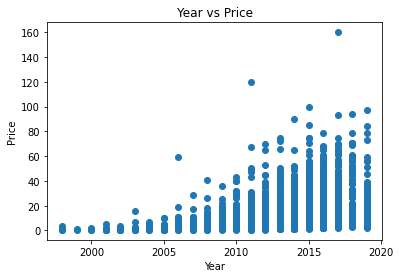

In [ ]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(file1.Year,file1.Price)



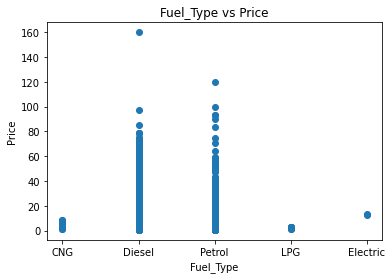

In [ ]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(file1.Fuel_Type,file1.Price)


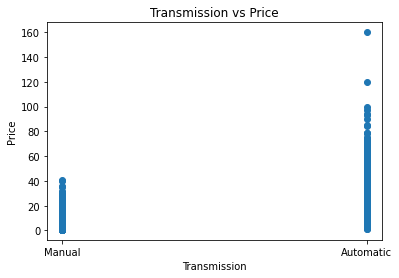

In [ ]:

#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(file1.Transmission,file1.Price)



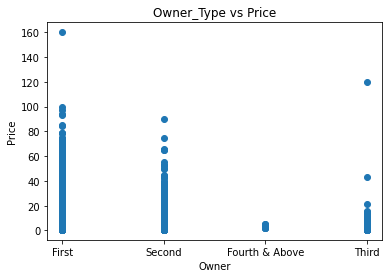

In [ ]:
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(file1.Owner_Type,file1.Price)

#Removing Outlier

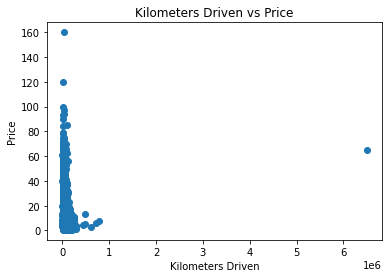

In [ ]:
plt.title("Kilometers Driven vs Price")
plt.xlabel ("Kilometers Driven")
plt.ylabel("Price")
plt.scatter(file1.Kilometers_Driven,file1.Price)

In [ ]:
#removing outlier
file1.drop(file1[file1['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

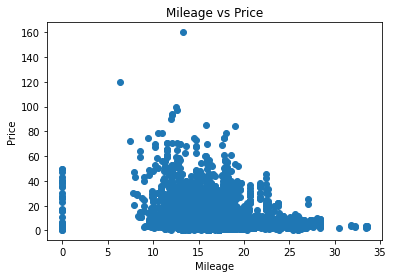

In [ ]:
#mileage vs price
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(file1.Mileage,file1.Price)

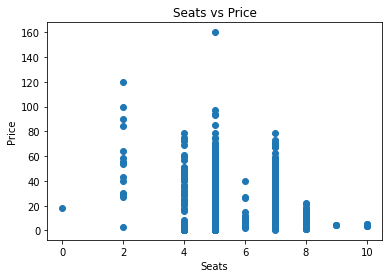

In [ ]:
#Seats vs price
plt.title("Seats vs Price")
plt.xlabel("Seats")
plt.ylabel("Price")
plt.scatter(file1.Seats,file1.Price)

In [ ]:
#Counting no of rows with zero values in Mileage and Seats column :
file1.isin([0]).sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              67
Engine                0
Power                 0
Seats                 1
Price                 0
Brand_Name            0
dtype: int64

In [ ]:
#Dropping 1 row from Seats column with zero value:
file1.drop(file1[file1['Seats']==0].index,axis=0,inplace=True)

In [ ]:
#we have already calculated the mode of milage column for filling #null values which is 17.0
file1["Mileage"].replace({0.0:17.0 },inplace=True)

In [ ]:
#Counting no of rows with zero values in Mileage and Seats column :
file1.isin([0]).sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand_Name           0
dtype: int64

#Handling categorical Columns : Machine Learning algorithms work with a numeric value.

In [ ]:
#creating a new dataframe 
file2 = file1.copy()

In [ ]:
#Fuel_Type ,Transmission,Owner_type,and Brand_Name are categorical columns:
from sklearn.preprocessing import LabelEncoder
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()
file2['Fuel_Type_n']= le_Fuel_Type.fit_transform(file2['Fuel_Type'])
file2['Transmission_n']=le_Transmission.fit_transform(file2['Transmission'])
file2['Owner_Type_n']=le_Owner_Type.fit_transform(file2['Owner_Type'])
file2['Brand_Name_n']=le_Brand_Name.fit_transform(file2['Brand_Name'])

In [ ]:
file2.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0,1,0,17
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1,1,0,10
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,4,1,0,9
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1,1,0,17
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,1,0,2,1


In [ ]:
#Dropping columns with data type object:
file2=file2.drop(["Fuel_Type","Transmission","Owner_Type","Brand_Name"],axis='columns')

In [ ]:
file2.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,1,0,17
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,1,0,10
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,4,1,0,9
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,1,0,17
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,2,1


In [ ]:
#Shuffling the columns as per our need:
file2=file2[['Brand_Name_n','Year','Kilometers_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Mileage','Engine','Power','Seats','Price']]

In [ ]:
file2

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats,Price
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6006,18,2009,102002,1,0,0,8.70,2987.0,224.34,5.0,10.75
6007,17,2011,68000,1,1,0,19.30,1248.0,73.90,5.0,2.75
6008,22,2013,40000,1,0,2,17.85,2967.0,300.00,4.0,45.00
6009,27,2015,33500,4,0,0,19.16,2494.0,158.20,5.0,19.75


#Correlation matrix

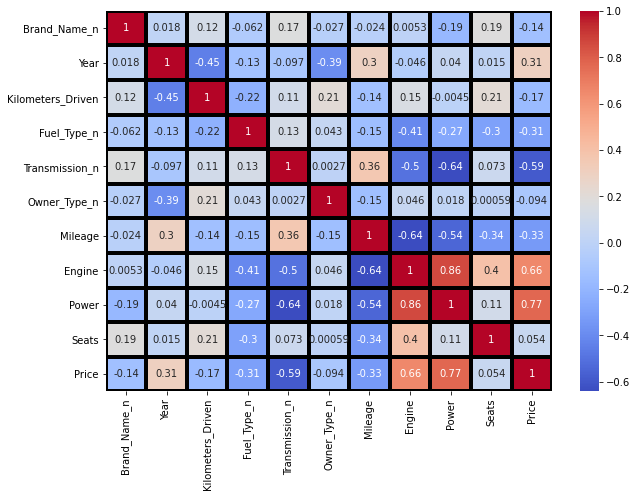

In [ ]:
corrMatrix = file2.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

#Creating 2 new data frames:

In [ ]:
file2_input = file2.drop(['Price'], axis='columns')

In [ ]:
file2_input.head()

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0


In [ ]:
file2_target = file2['Price']

In [ ]:
file2_target

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6006    10.75
6007     2.75
6008    45.00
6009    19.75
6010     3.20
Name: Price, Length: 6009, dtype: float64

In [ ]:
#dataframe to csv 
file2_input.to_csv(r'/content/drive/MyDrive/sari/prediksi_baru/databaru.csv', index = False)

#Now let us see which features are the most and least important for predicting the price of a used car:

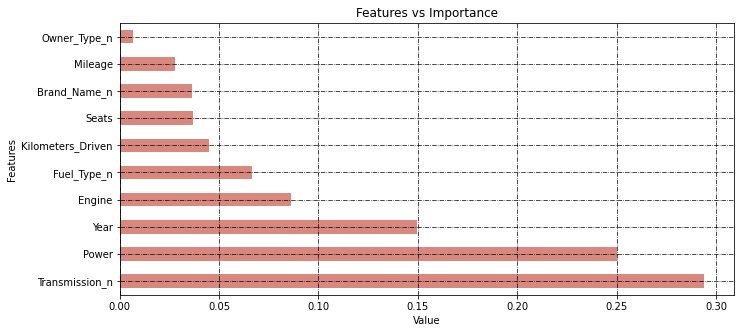

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(file2_input,file2_target)
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=file2_input.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
plt.grid()
feat_importances.nlargest(10).plot(kind='barh',color='#D98880')##45B39D
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

#Applying different models on the data :

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(file2_input,file2_target):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'k-Nearest_Neigbors': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors':[2,3,4,5,6,7,8,9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [50,60]
           }}}
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(file2_input,file2_target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

result=find_best_model_using_gridsearchcv(file2_input,file2_target)
result

,model,best_score,best_params
0,linear_regression,0.686311,{'normalize': False}
1,decision_tree,0.812400,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,k-Nearest_Neigbors,0.556032,{'n_neighbors': 5}
3,random_forest,0.888346,"{'max_features': 'sqrt', 'n_estimators': 50}"


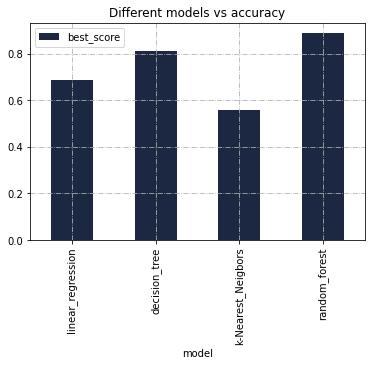

In [ ]:
result_map=result.drop(['best_params'],axis='columns')
result_map.plot(x="model",y='best_score',kind='bar',color='#1c2842',title='Different models vs accuracy')
plt.grid(linestyle='-.')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (file2_input, file2_target, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train)

4807

In [ ]:
len(X_test)

1202

#In the above prediction:

1.   17-Maruti(Brand_Name)
2.   2014(year)
3.   27365(KM drove)
4.   28.4(mileage)
5.   1248(cc)
6.   74(power)
7.   5.0-no of seats
8.   1-Diesel
9.   1-Manual
10.  0-first hand

#Training data using random forest

In [ ]:
randomforest_model = RandomForestRegressor(max_features='sqrt', bootstrap='True', n_estimators= 60)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap='True', ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
randomforest_model.score(X_test, y_test)

0.9062287940909097

In [ ]:
#Importing the model in a file :
import pickle

In [ ]:
#writing model in a file
pickle.dump(randomforest_model, open('/content/drive/MyDrive/sari/prediksi_baru/randomforest_model.pkl','wb'))

In [ ]:
#reading the file
rm_model = pickle.load(open('/content/drive/MyDrive/sari/prediksi_baru/randomforest_model.pkl', 'rb'))

##Testing Model

In [ ]:
rm_model.predict([[17,2014,27365, 28.4, 1248, 74, 5.0, 1,1,0]])

array([6.39033333])

#Training data using decision tree

In [ ]:
decisiontree_model = DecisionTreeRegressor(random_state=40, criterion ='mse', splitter = 'best')
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=40, splitter='best')

In [ ]:
decisiontree_model.score(X_test, y_test)

0.7668835395370592

In [ ]:
#Importing the model in a file :
import pickle

In [ ]:
#writing model in a file
pickle.dump(decisiontree_model, open('/content/drive/MyDrive/sari/prediksi_baru/decisiontree_model.pkl','wb'))

In [ ]:
#reading the file
ds_model = pickle.load(open('/content/drive/MyDrive/sari/prediksi_baru/decisiontree_model.pkl', 'rb'))

##Testing Model

In [ ]:
ds_model.predict([[17,2014,27365, 28.4, 1248, 74, 5.0, 1,1,0]])

array([13.])

#Training data using Linear Regression

In [ ]:
linearreg_model = LinearRegression(normalize = 'False')
linearreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='False')

In [ ]:
linearreg_model.score(X_test, y_test)

0.6959644735975172

In [ ]:
#Importing the model in a file :
import pickle

In [ ]:
#writing model in a file
pickle.dump(linearreg_model, open('/content/drive/MyDrive/sari/prediksi_baru/linearreg_model.pkl','wb'))

In [ ]:
#reading the file
linearreg_model = pickle.load(open('/content/drive/MyDrive/sari/prediksi_baru/linearreg_model.pkl', 'rb'))

##Testing Model

In [ ]:
linearreg_model.predict([[17,2014,27365, 28.4, 1248, 74, 5.0, 1,1,0]])

array([-3610.10927608])

#Training data using kNN

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn_model.score(X_test, y_test)

0.5187896029065435

In [ ]:
#Importing the model in a file :
import pickle

In [ ]:
#writing model in a file
pickle.dump(knn_model, open('/content/drive/MyDrive/sari/prediksi_baru/knn_model.pkl','wb'))

In [ ]:
#reading the file
knn_model = pickle.load(open('/content/drive/MyDrive/sari/prediksi_baru/knn_model.pkl', 'rb'))

##Testing Model

In [ ]:
knn_model.predict([[17,2014,27365, 28.4, 1248, 74, 5.0, 1,1,0]])

array([3.068])